TD 4 - Data analysis
----------------------------

In this notebook, we manipulate some basic statistical notions using python libraries.

In [1]:
import pandas
import numpy as np
import scipy, scipy.stats
import random
from matplotlib import pyplot as plt
%matplotlib inline

### Compositionality

The compositionality dataset below comes from the experiments in compositionaliyty prediction described in [this paper](https://aclanthology.org/J19-1001/). We will focus on the column called _compositionality_  which contains average annotations on a scale from 0 to 5 by about 15-20 human judges per compound noun, on a set of 180 compound nouns in French. The details of the construction of this dataset can be found [here](https://aclanthology.org/P16-2026/). The dataset contains also many other columns that we may explore later, including automatic compositionality predictions.

##### Reading the data

We will read the full dataset from a tab-separated table file using Pandas, a very useful python library for data analysis.

In [2]:
results_df=pandas.read_csv('superjoined.norm.tsv', sep='\t')

results_df[['compound_lemma','compositionality']].sort_values('compositionality')

compound_lemma  compositionality
134       poule_mouillé            0.0000
127           pied_noir            0.1333
19          carte_blanc            0.2000
151       septième_ciel            0.2143
15       bouc_émissaire            0.2308
..                  ...               ...
0     activité_physique            4.9333
55          eau_potable            5.0000
170  téléphone_portable            5.0000
96         matière_gras            5.0000
52            eau_chaud            5.0000

[180 rows x 2 columns]

##### Mean, standard deviation

We will start by looking at some basic statistical descriptors of the _compositionality_ column.
* Is the `std` value below the population or sample standard deviation? To verify it, manually implement both formulas and check which value corresponds to the one reported below.

In [11]:
comp = results_df['compositionality']
freq = results_df['freq.w1&w2']
freq.describe()

count       180.000000
mean       9309.922222
std       13864.223072
min         106.000000
25%        1546.000000
50%        4084.500000
75%       13325.750000
max      108842.000000
Name: freq.w1&w2, dtype: float64

##### Histogram

We can also look at the histogram to have an idea of the distribution of values.
* Does this look like a normal distribution?
* Play with the bin size and observe what happens with the histogram

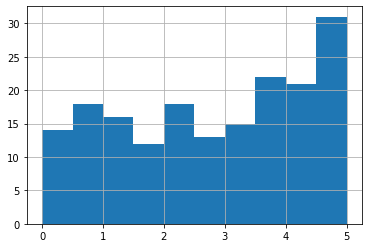

In [7]:
comp.hist(bins=10) # you can play with bin size to see what happens (default=10)
plt.show()

##### Central limit theorem - observation

We would like to test empirically whether the central limit theorem is verified on this data. We randomly subsample $n$ times a subset of $k$ compounds, calculate the average, and then check its distribution with a histogram. 

* Change the values of $n$ to see how larger values look more and more like a normal bell-shaped curve. 

Of course, more objective normality tests would be required to check this intuition, but the visualisation is quite convincing.

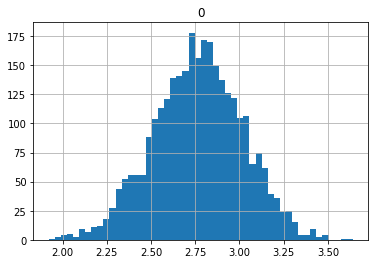

In [9]:
n = 3000 # number of resamples, increase and see what happens
k = 30 # sample size
avg = []
for i in range(n):
    subsample = comp.sample(k)
    avg.append(subsample.mean())
avgDF = pandas.DataFrame(avg)
avgDF.hist(bins=min(int(n/20),50))
plt.show()

##### Standardisation

Let us now standardise the average `compositionality` values sampled above so that they are centered around zero and have unit standard deviation

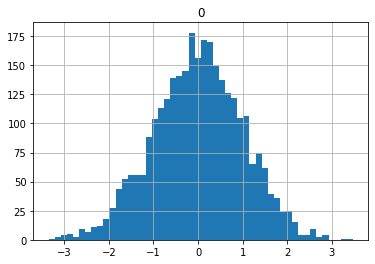

In [10]:
std_avgDF = (avgDF - avgDF.mean()) / avgDF.std()
std_avgDF.hist(bins=min(int(n/20),50))
plt.show()

### Compositionality and frequency

We would like to study the relationship between compositionality and compound frequency. Let us extract these two variables from the dataset.

In [90]:
results_df
compfreq = results_df[['compositionality','freq.w1&w2']]
compfreq

compositionality  freq.w1&w2
0              4.9333       13292
1              3.6000       19681
2              4.6000       14437
3              3.6364         540
4              1.3077        1259
..                ...         ...
175            3.8000       10067
176            4.6923        5529
177            4.3571        1395
178            3.9231       19950
179            3.2000         859

[180 rows x 2 columns]

##### Scatter plot

Let's start by visually inspecting the relation between the two quantities with a scatter plot.

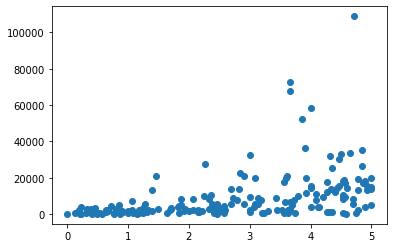

In [93]:
plt.scatter(compfreq['compositionality'],compfreq['freq.w1&w2'])
plt.show()

We can see that maybe some relation exists, but it is not so straightforward to visualise it. This may be because frequency does not increase linearly (its distribution is [Zipfian](https://en.wikipedia.org/wiki/Zipf%27s_law)), and is easier to analyse in log domain.
* Build a scatter plot to compare compositionality with the logarithm of frequency (instead of raw frequency)

##### Correlation

Pearson's correlation coefficient can only measure linear correlation. Spearman correlation, on the other hand, measures monotonic correlation, as shown below.

Pearson's r = 0.91, Spearman's rho = 1.00


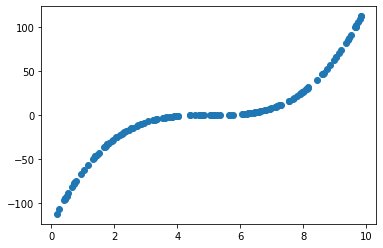

In [122]:
x = np.random.uniform(0,10,150)
cube = (x-5)**3
r = scipy.stats.pearsonr(x,cube)
rho = scipy.stats.spearmanr(x,cube)
print("Pearson's r = {:.2f}, Spearman's rho = {:.2f}".format(r[0],rho[0]))
plt.scatter(x,cube)
plt.show()

Check the difference between the two correlation scores for the compositionality vs. frequency data:
* Calculate the pearson and Spearman correlation between both variables using Pandas or scipy
* Calculate the correlation manually, using the formula for linear correlation between ranks, and check the results